# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Understanding Data

In [2]:
# Loading Dataset
df = pd.read_csv('cars.csv')

In [3]:
# Showing Dataset
df.head()

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [4]:
# This code randomly selects 7 rows from the DataFrame 'df' and returns them as a new DataFrame
df.sample(7)

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
726,726,Toyota,Corolla,2360000,2018,Punjab,47000,Petrol,1300,White,Local,Sedan,Manual,Registered
35582,35582,Suzuki,Khyber,460000,1998,Punjab,200000,Petrol,1000,Red,Local,Hatchback,Manual,Registered
23595,23595,Suzuki,Mehran,245000,1992,Punjab,120000,Petrol,800,Grey,Local,Hatchback,Manual,Registered
39035,39035,Toyota,Corolla,2050000,2015,Punjab,55000,Petrol,1300,Black,Local,Sedan,Manual,Registered
18628,18628,Suzuki,Mehran,360000,2001,Punjab,125000,Petrol,800,Silver,Local,Hatchback,Manual,Registered
38946,38946,Suzuki,Bolan,710000,2013,Punjab,120000,Petrol,800,White,Local,Van,Manual,Registered
31370,31370,Suzuki,Bolan,415000,2011,Punjab,100000,Petrol,800,Black,Local,Mini Van,Manual,Registered


In [5]:
# check how data big is or shape of the dataset 
df.shape

(46022, 14)

In [6]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           46022 non-null  int64 
 1   Company Name         46022 non-null  object
 2   Model Name           46022 non-null  object
 3   Price                46022 non-null  int64 
 4   Model Year           46022 non-null  int64 
 5   Location             46022 non-null  object
 6   Mileage              46022 non-null  int64 
 7   Engine Type          46022 non-null  object
 8   Engine Capacity      46022 non-null  int64 
 9   Color                46022 non-null  object
 10  Assembly             46022 non-null  object
 11  Body Type            46022 non-null  object
 12  Transmission Type    46022 non-null  object
 13  Registration Status  46022 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [7]:
# Check total number of missing values in a dataset
df.isnull().sum().sum()

0

In [8]:
# Check if there's any duplicate value in the dataset
df.duplicated().sum()

0

In [9]:
# Dropping 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.describe()

,Price,Model Year,Mileage,Engine Capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


In [11]:
# Seeing value counts of 'object' columns
for i in df.columns:
    if df[i].dtype == 'object':
        val = df[i].value_counts()
        print(pd.DataFrame(val))

            Company Name
Suzuki             15944
Toyota             15560
Honda               9245
Daihatsu            2281
Nissan               575
Mitsubishi           498
Mercedes             435
Hyundai              360
Audi                 208
FAW                  187
BMW                  137
Mazda                120
Lexus                 81
KIA                   81
United                64
Subaru                58
Daewoo                48
Chevrolet             40
Range                 33
SsangYong             13
Land                  10
DFSK                   9
Chery                  8
Porsche                8
Jeep                   6
MINI                   5
Fiat                   4
Hummer                 1
Jaguar                 1
Adam                   1
Volvo                  1
          Model Name
Corolla         8198
Mehran          4766
Civic           4214
Cultus          3645
City            3109
...              ...
Terrano            1
Macan              1
Panamera   

In [12]:
# Seeing value counts of 'int64' columns
for i in df.columns:
    if df[i].dtype == 'int64':
        val = df[i].value_counts()
        print(pd.DataFrame(val))

          Price
650000      585
1450000     495
1650000     493
1350000     488
1250000     459
...         ...
349000        1
574000        1
776000        1
58500000      1
11600000      1

[1419 rows x 1 columns]
      Model Year
2017        3892
2015        3842
2016        3776
2014        3438
2018        3312
2019        2739
2007        2645
2013        2584
2012        2445
2011        2168
2006        2099
2010        1781
2005        1746
2008        1687
2004        1243
2009        1171
2003         903
2002         567
2001         518
2000         458
1996         442
1997         404
1998         403
1999         384
1995         339
1994         248
1993         242
1992         213
1990         178
1991         155
        Mileage
100000     2230
150000     1266
80000      1030
120000      885
200000      880
...         ...
103287        1
165223        1
20750         1
135820        1
103269        1

[5573 rows x 1 columns]
      Engine Capacity
1000            1

# Data Visualisation

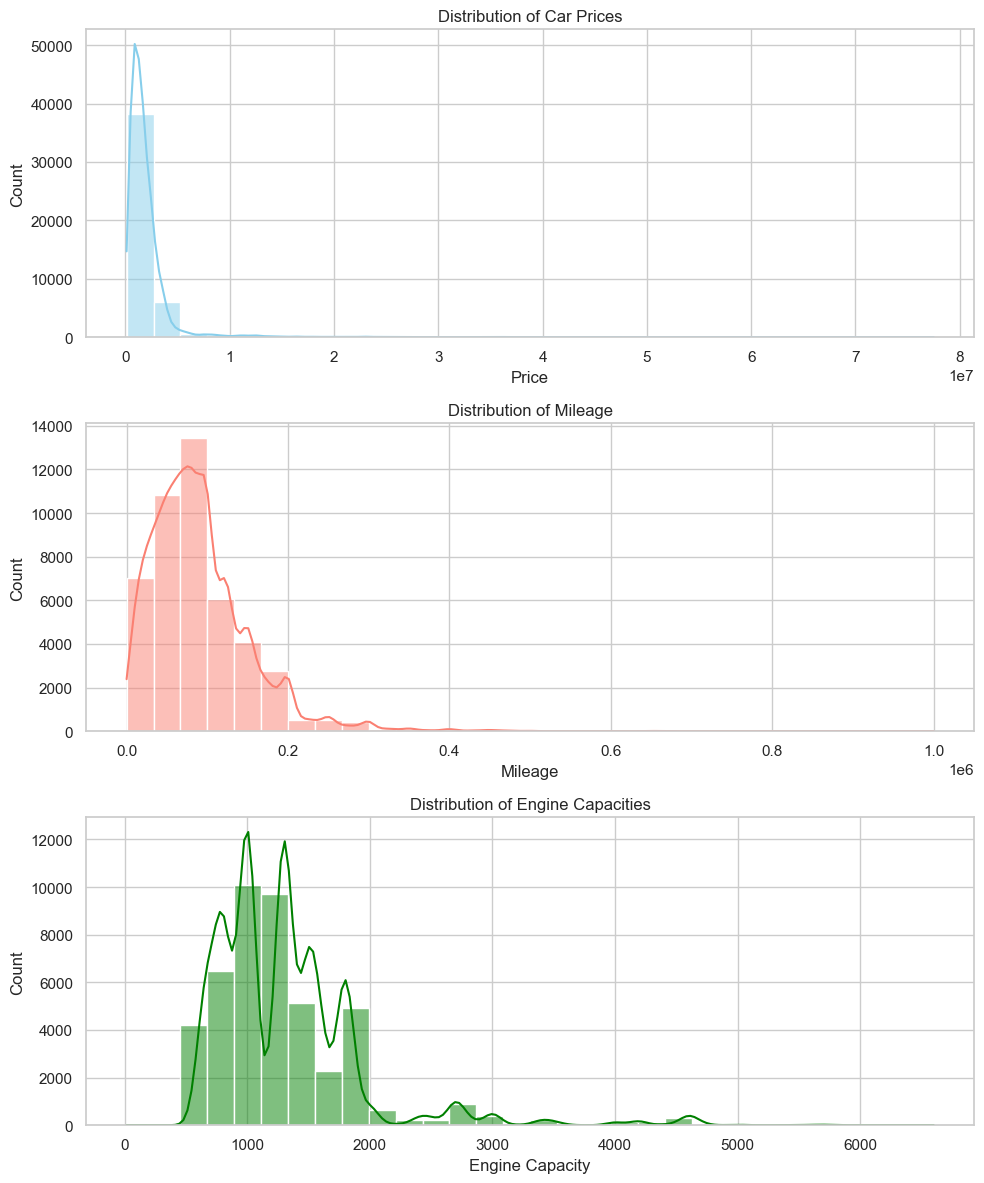

In [13]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for Price, Mileage, and Engine Capacity
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot Price distribution
sns.histplot(data=df, x='Price', kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Distribution of Car Prices')

# Plot Mileage distribution
sns.histplot(data=df, x='Mileage', kde=True, ax=axes[1], bins=30, color='salmon')
axes[1].set_title('Distribution of Mileage')

# Plot Engine Capacity distribution
sns.histplot(data=df, x='Engine Capacity', kde=True, ax=axes[2], bins=30, color='green')
axes[2].set_title('Distribution of Engine Capacities')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

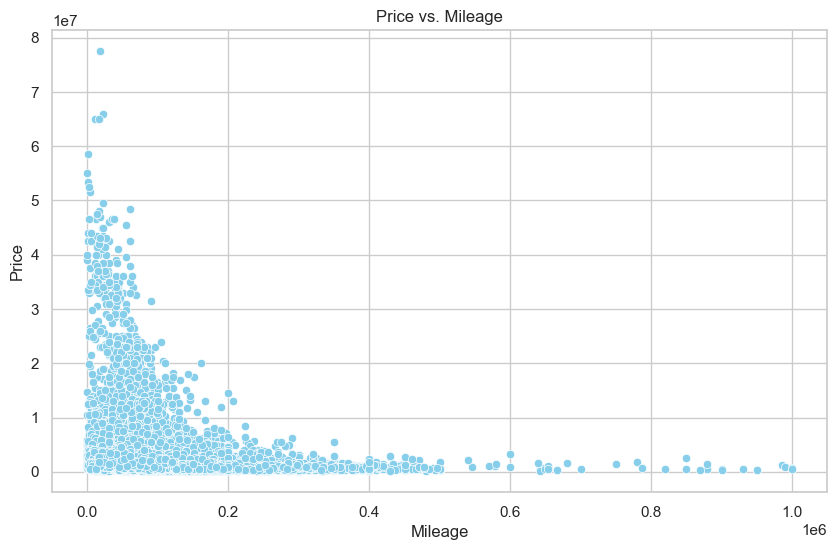

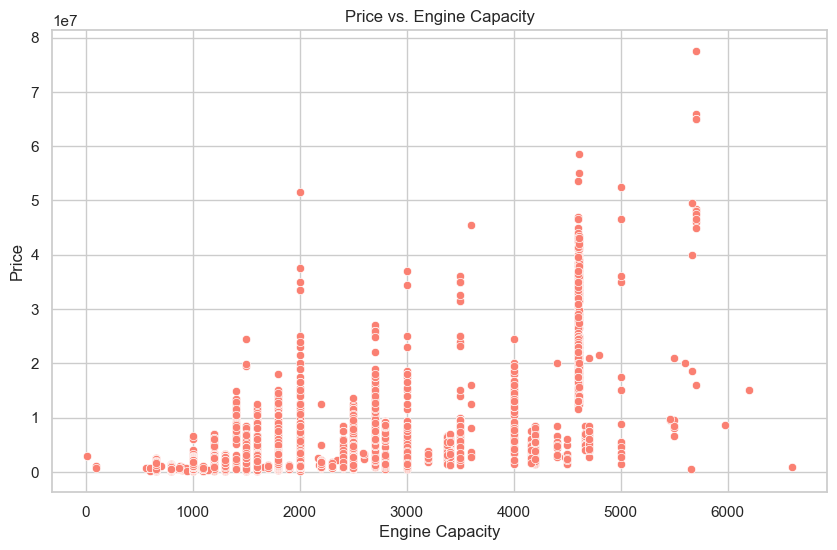

In [14]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot for Price vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price', color='skyblue')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot for Price vs. Engine Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Capacity', y='Price', color='salmon')
plt.title('Price vs. Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Price')
plt.show()

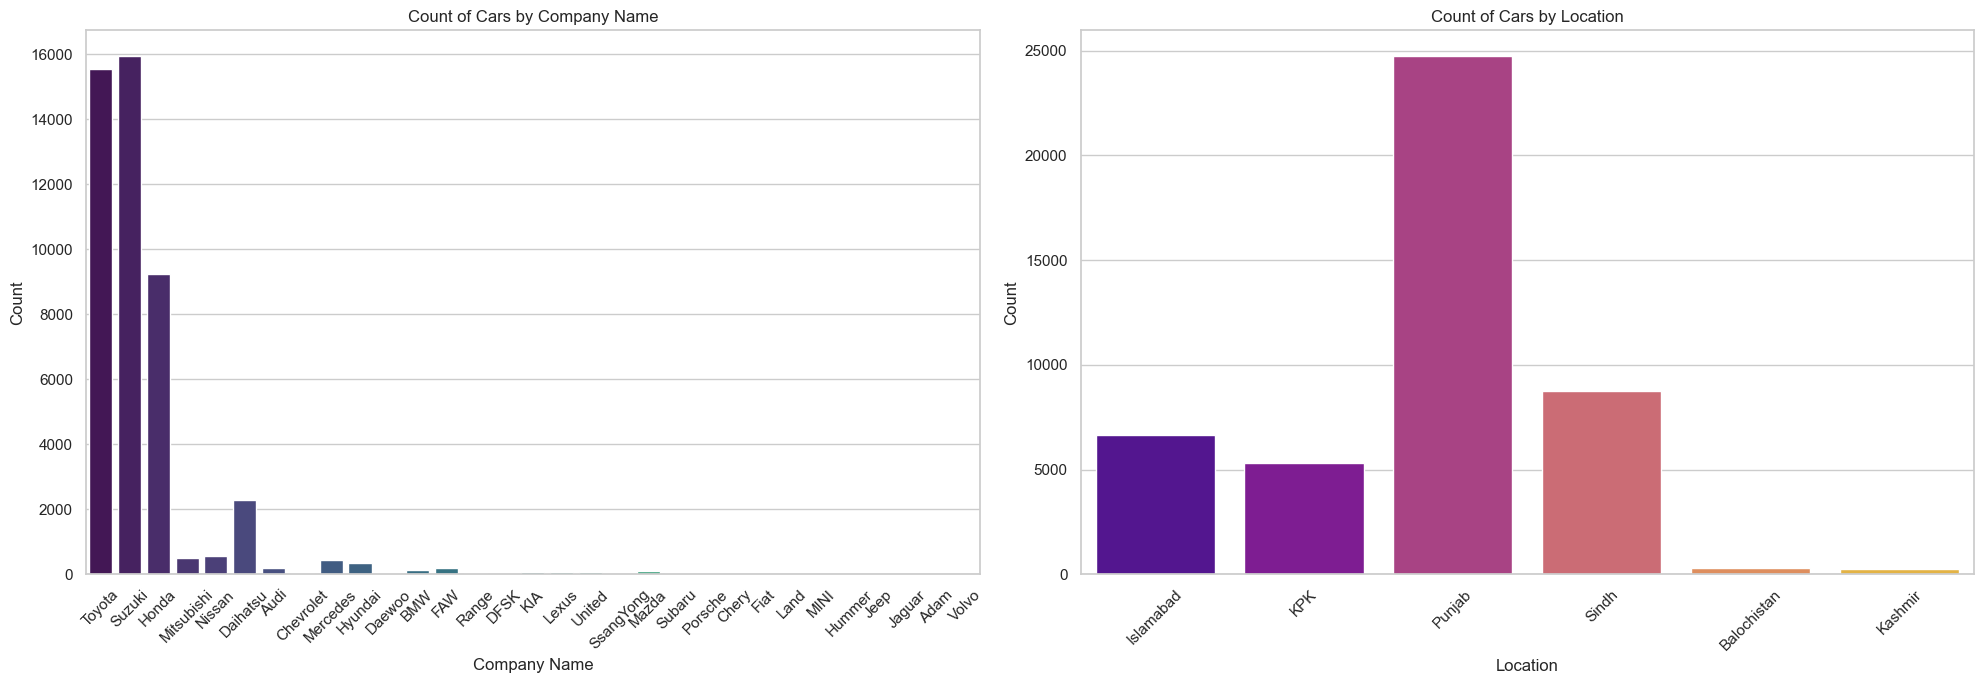

In [15]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for Count of Cars by Company Name and Count of Cars by Location
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Count plot for Cars by Company Name
sns.countplot(data=df, x='Company Name', ax=axes[0], palette='viridis')
axes[0].set_title('Count of Cars by Company Name')
axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Count')

# Count plot for Cars by Location
sns.countplot(data=df, x='Location', ax=axes[1], palette='plasma')
axes[1].set_title('Count of Cars by Location')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

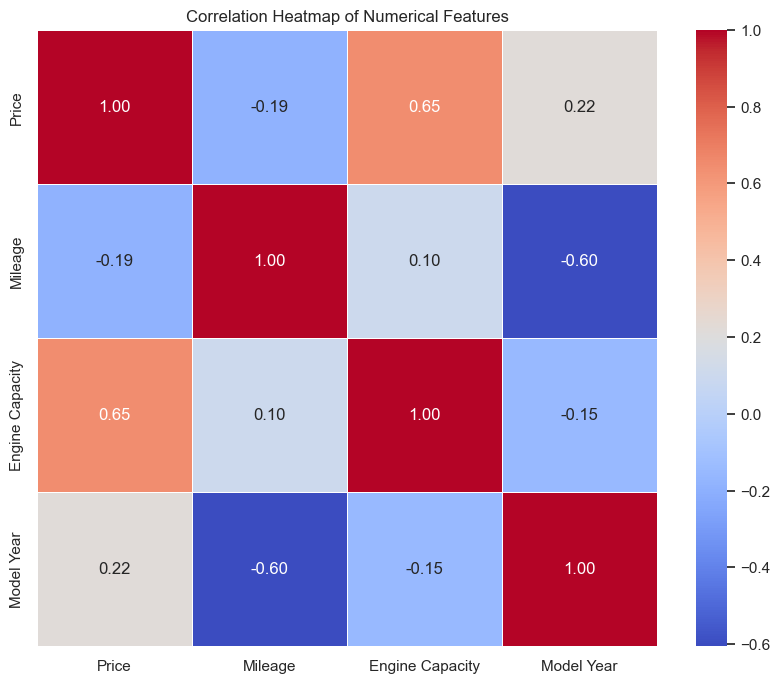

In [16]:
# Select numerical features for the correlation heatmap
numerical_features = ['Price', 'Mileage', 'Engine Capacity', 'Model Year']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Features')

# Show the plot
plt.show()

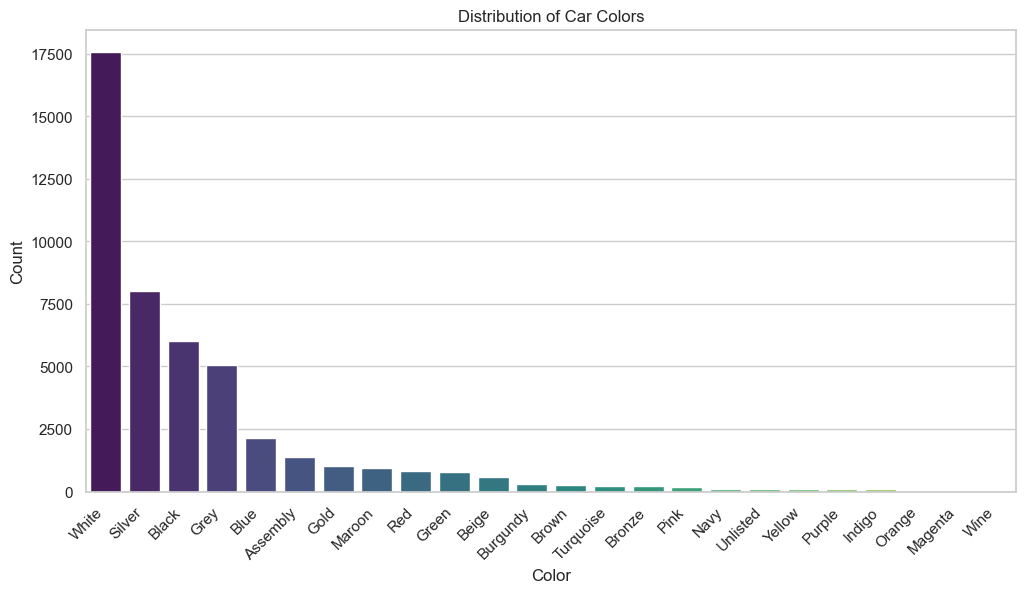

In [17]:
# Count the occurrences of each color
color_counts = df['Color'].value_counts()

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the distribution of car colors
plt.figure(figsize=(12, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')
plt.title('Distribution of Car Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Encoding Categorical Data

## Binary Encoding

In [18]:
# Applying binary encoder to encode 'Assembly', 'Transmission Type', 'Registration Status' values
columns_to_binary_encode = ['Assembly', 'Transmission Type', 'Registration Status']
binary_encoder = ce.BinaryEncoder(cols=columns_to_binary_encode)
df = binary_encoder.fit_transform(df)

In [19]:
# Showing Dataset after binary encoding
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,0,1,Hatchback,0,1,0,1
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,1,0,Sedan,0,1,1,0
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,1,0,Hatchback,0,1,0,1
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,1,0,Hatchback,1,0,1,0
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,1,0,Sedan,1,0,1,0


In [20]:
# check how data big is or shape of the dataset 
df.shape

(46022, 16)

## Encode Categorical Data Using Dictionaries Method

In [21]:
# Dictionary with company names as keys and corresponding numbers as values
company_dict = {
    'Suzuki': 1,
    'Toyota': 2,
    'Honda': 3,
    'Daihatsu': 4,
    'Nissan': 5,
    'Mitsubishi': 6,
    'Mercedes': 7,
    'Hyundai': 8,
    'Audi': 9,
    'FAW': 10,
    'BMW': 11,
    'Mazda': 12,
    'Lexus': 13,
    'KIA': 14,
    'United': 15,
    'Subaru': 16,
    'Daewoo': 17,
    'Chevrolet': 18,
    'Range': 19,
    'SsangYong': 20,
    'Land': 21,
    'DFSK': 22,
    'Chery': 23,
    'Porsche': 24,
    'Jeep': 25,
    'MINI': 26,
    'Fiat': 27,
    'Hummer': 28,
    'Jaguar': 29,
    'Adam': 30,
    'Volvo': 31
}

df['Company Name'] = df['Company Name'].map(company_dict)

# Display the updated DataFrame
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,2,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,0,1,Hatchback,0,1,0,1
1,2,Corolla,111000,2019,KPK,11111,Petrol,1300,White,1,0,Sedan,0,1,1,0
2,1,Alto,1530000,2019,KPK,17500,Petrol,660,White,1,0,Hatchback,0,1,0,1
3,1,Alto,1650000,2019,Punjab,9600,Petrol,660,White,1,0,Hatchback,1,0,1,0
4,2,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,1,0,Sedan,1,0,1,0


In [22]:
# Dictionary with Model Name as keys and corresponding numbers as values
model_dict = {model: i + 1 for i, model in enumerate(df['Model Name'].unique())}

df['Model Name'] = df['Model Name'].map(model_dict)

# Display the updated DataFrame
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,2,1,2385000,2017,Islamabad,9869,Petrol,1000,Silver,0,1,Hatchback,0,1,0,1
1,2,2,111000,2019,KPK,11111,Petrol,1300,White,1,0,Sedan,0,1,1,0
2,1,3,1530000,2019,KPK,17500,Petrol,660,White,1,0,Hatchback,0,1,0,1
3,1,3,1650000,2019,Punjab,9600,Petrol,660,White,1,0,Hatchback,1,0,1,0
4,2,2,1435000,2010,Islamabad,120000,Petrol,1300,Black,1,0,Sedan,1,0,1,0


In [23]:
# Dictionary with locations as keys and corresponding numbers as values
location_dict = {location: i + 1 for i, location in enumerate(df['Location'].unique())}

df['Location'] = df['Location'].map(location_dict)

# Display the updated DataFrame
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,2,1,2385000,2017,1,9869,Petrol,1000,Silver,0,1,Hatchback,0,1,0,1
1,2,2,111000,2019,2,11111,Petrol,1300,White,1,0,Sedan,0,1,1,0
2,1,3,1530000,2019,2,17500,Petrol,660,White,1,0,Hatchback,0,1,0,1
3,1,3,1650000,2019,3,9600,Petrol,660,White,1,0,Hatchback,1,0,1,0
4,2,2,1435000,2010,1,120000,Petrol,1300,Black,1,0,Sedan,1,0,1,0


In [24]:
# Dictionary with Engine Type as keys and corresponding numbers as values
location_dict = {location: i + 1 for i, location in enumerate(df['Engine Type'].unique())}

df['Engine Type'] = df['Engine Type'].map(location_dict)

# Display the updated DataFrame
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,2,1,2385000,2017,1,9869,1,1000,Silver,0,1,Hatchback,0,1,0,1
1,2,2,111000,2019,2,11111,1,1300,White,1,0,Sedan,0,1,1,0
2,1,3,1530000,2019,2,17500,1,660,White,1,0,Hatchback,0,1,0,1
3,1,3,1650000,2019,3,9600,1,660,White,1,0,Hatchback,1,0,1,0
4,2,2,1435000,2010,1,120000,1,1300,Black,1,0,Sedan,1,0,1,0


In [25]:
# Dictionary with Color as keys and corresponding numbers as values
location_dict = {location: i + 1 for i, location in enumerate(df['Color'].unique())}

df['Color'] = df['Color'].map(location_dict)

# Display the updated DataFrame
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,2,1,2385000,2017,1,9869,1,1000,1,0,1,Hatchback,0,1,0,1
1,2,2,111000,2019,2,11111,1,1300,2,1,0,Sedan,0,1,1,0
2,1,3,1530000,2019,2,17500,1,660,2,1,0,Hatchback,0,1,0,1
3,1,3,1650000,2019,3,9600,1,660,2,1,0,Hatchback,1,0,1,0
4,2,2,1435000,2010,1,120000,1,1300,3,1,0,Sedan,1,0,1,0


In [26]:
# Dictionary with Body Type as keys and corresponding numbers as values
location_dict = {location: i + 1 for i, location in enumerate(df['Body Type'].unique())}

df['Body Type'] = df['Body Type'].map(location_dict)

# Display the updated DataFrame
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,2,1,2385000,2017,1,9869,1,1000,1,0,1,1,0,1,0,1
1,2,2,111000,2019,2,11111,1,1300,2,1,0,2,0,1,1,0
2,1,3,1530000,2019,2,17500,1,660,2,1,0,1,0,1,0,1
3,1,3,1650000,2019,3,9600,1,660,2,1,0,1,1,0,1,0
4,2,2,1435000,2010,1,120000,1,1300,3,1,0,2,1,0,1,0


In [27]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Company Name           46022 non-null  int64
 1   Model Name             46022 non-null  int64
 2   Price                  46022 non-null  int64
 3   Model Year             46022 non-null  int64
 4   Location               46022 non-null  int64
 5   Mileage                46022 non-null  int64
 6   Engine Type            46022 non-null  int64
 7   Engine Capacity        46022 non-null  int64
 8   Color                  46022 non-null  int64
 9   Assembly_0             46022 non-null  int64
 10  Assembly_1             46022 non-null  int64
 11  Body Type              46022 non-null  int64
 12  Transmission Type_0    46022 non-null  int64
 13  Transmission Type_1    46022 non-null  int64
 14  Registration Status_0  46022 non-null  int64
 15  Registration Status_1  46022 non-nul

# Get Statistical Information, Correlation Matrix of Columns

In [28]:
""" This code provides statistical summary information about the DataFrame 'df' including measures like count, mean, standard 
deviation, minimum, and maximum values for each numeric column. """

df.describe()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
count,46022.000000,46022.000000,4.602200e+04,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000,46022.000000
mean,2.394246,16.471970,2.014153e+06,2011.035374,2.815979,90965.128243,1.084112,1313.115575,4.167116,0.678154,0.321846,1.783734,0.534766,0.465234,0.927665,0.072335
std,2.156533,23.322084,2.939071e+06,6.399403,0.962843,63656.656034,0.373598,614.690832,4.120176,0.467189,0.467189,1.062409,0.498795,0.498795,0.259045,0.259045
min,1.000000,1.000000,1.110000e+05,1990.000000,1.000000,1.000000,1.000000,16.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,8.500000e+05,2007.000000,2.000000,48899.500000,1.000000,1000.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,9.000000,1.450000e+06,2013.000000,3.000000,80000.000000,1.000000,1300.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,3.000000,17.000000,2.300000e+06,2016.000000,3.000000,120000.000000,1.000000,1500.000000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
max,31.000000,196.000000,7.750000e+07,2019.000000,6.000000,999999.000000,3.000000,6600.000000,24.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# This code calculates the correlation between numeric columns in the DataFrame 'df' and returns a correlation matrix
df.corr()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
Company Name,1.000000,0.563614,0.158692,-0.054355,-0.002879,0.032271,0.050377,0.187996,0.032168,-0.256077,0.256077,0.195505,-0.223435,0.223435,-0.050276,0.050276
Model Name,0.563614,1.000000,0.092325,-0.136723,0.019733,0.037095,0.104869,0.107151,0.050466,-0.329583,0.329583,0.223467,-0.123051,0.123051,-0.067851,0.067851
Price,0.158692,0.092325,1.000000,0.217494,-0.043011,-0.188658,0.094228,0.645924,-0.069482,-0.263571,0.263571,0.231561,-0.337521,0.337521,-0.205306,0.205306
Model Year,-0.054355,-0.136723,0.217494,1.000000,0.029935,-0.604310,0.005781,-0.151290,-0.154379,0.029035,-0.029035,-0.015673,-0.192810,0.192810,-0.216374,0.216374
Location,-0.002879,0.019733,-0.043011,0.029935,1.000000,-0.058250,0.012465,-0.050503,0.042364,0.011076,-0.011076,-0.012460,0.005200,-0.005200,0.003345,-0.003345
Mileage,0.032271,0.037095,-0.188658,-0.604310,-0.058250,1.000000,-0.004544,0.098138,0.088415,0.025767,-0.025767,0.031681,0.165920,-0.165920,0.214869,-0.214869
Engine Type,0.050377,0.104869,0.094228,0.005781,0.012465,-0.004544,1.000000,0.196937,0.034784,-0.272159,0.272159,0.210341,-0.181213,0.181213,-0.191743,0.191743
Engine Capacity,0.187996,0.107151,0.645924,-0.151290,-0.050503,0.098138,0.196937,1.000000,-0.037027,-0.202750,0.202750,0.346734,-0.334039,0.334039,-0.014243,0.014243
Color,0.032168,0.050466,-0.069482,-0.154379,0.042364,0.088415,0.034784,-0.037027,1.000000,-0.075460,0.075460,-0.047058,0.001481,-0.001481,-0.007709,0.007709
Assembly_0,-0.256077,-0.329583,-0.263571,0.029035,0.011076,0.025767,-0.272159,-0.202750,-0.075460,1.000000,-1.000000,-0.126052,0.625581,-0.625581,0.318439,-0.318439


In [30]:
# This code calculates the correlation of each numeric column with the 'Price' column in the DataFrame 'df'
df.corr()['Price']

Company Name             0.158692
Model Name               0.092325
Price                    1.000000
Model Year               0.217494
Location                -0.043011
Mileage                 -0.188658
Engine Type              0.094228
Engine Capacity          0.645924
Color                   -0.069482
Assembly_0              -0.263571
Assembly_1               0.263571
Body Type                0.231561
Transmission Type_0     -0.337521
Transmission Type_1      0.337521
Registration Status_0   -0.205306
Registration Status_1    0.205306
Name: Price, dtype: float64

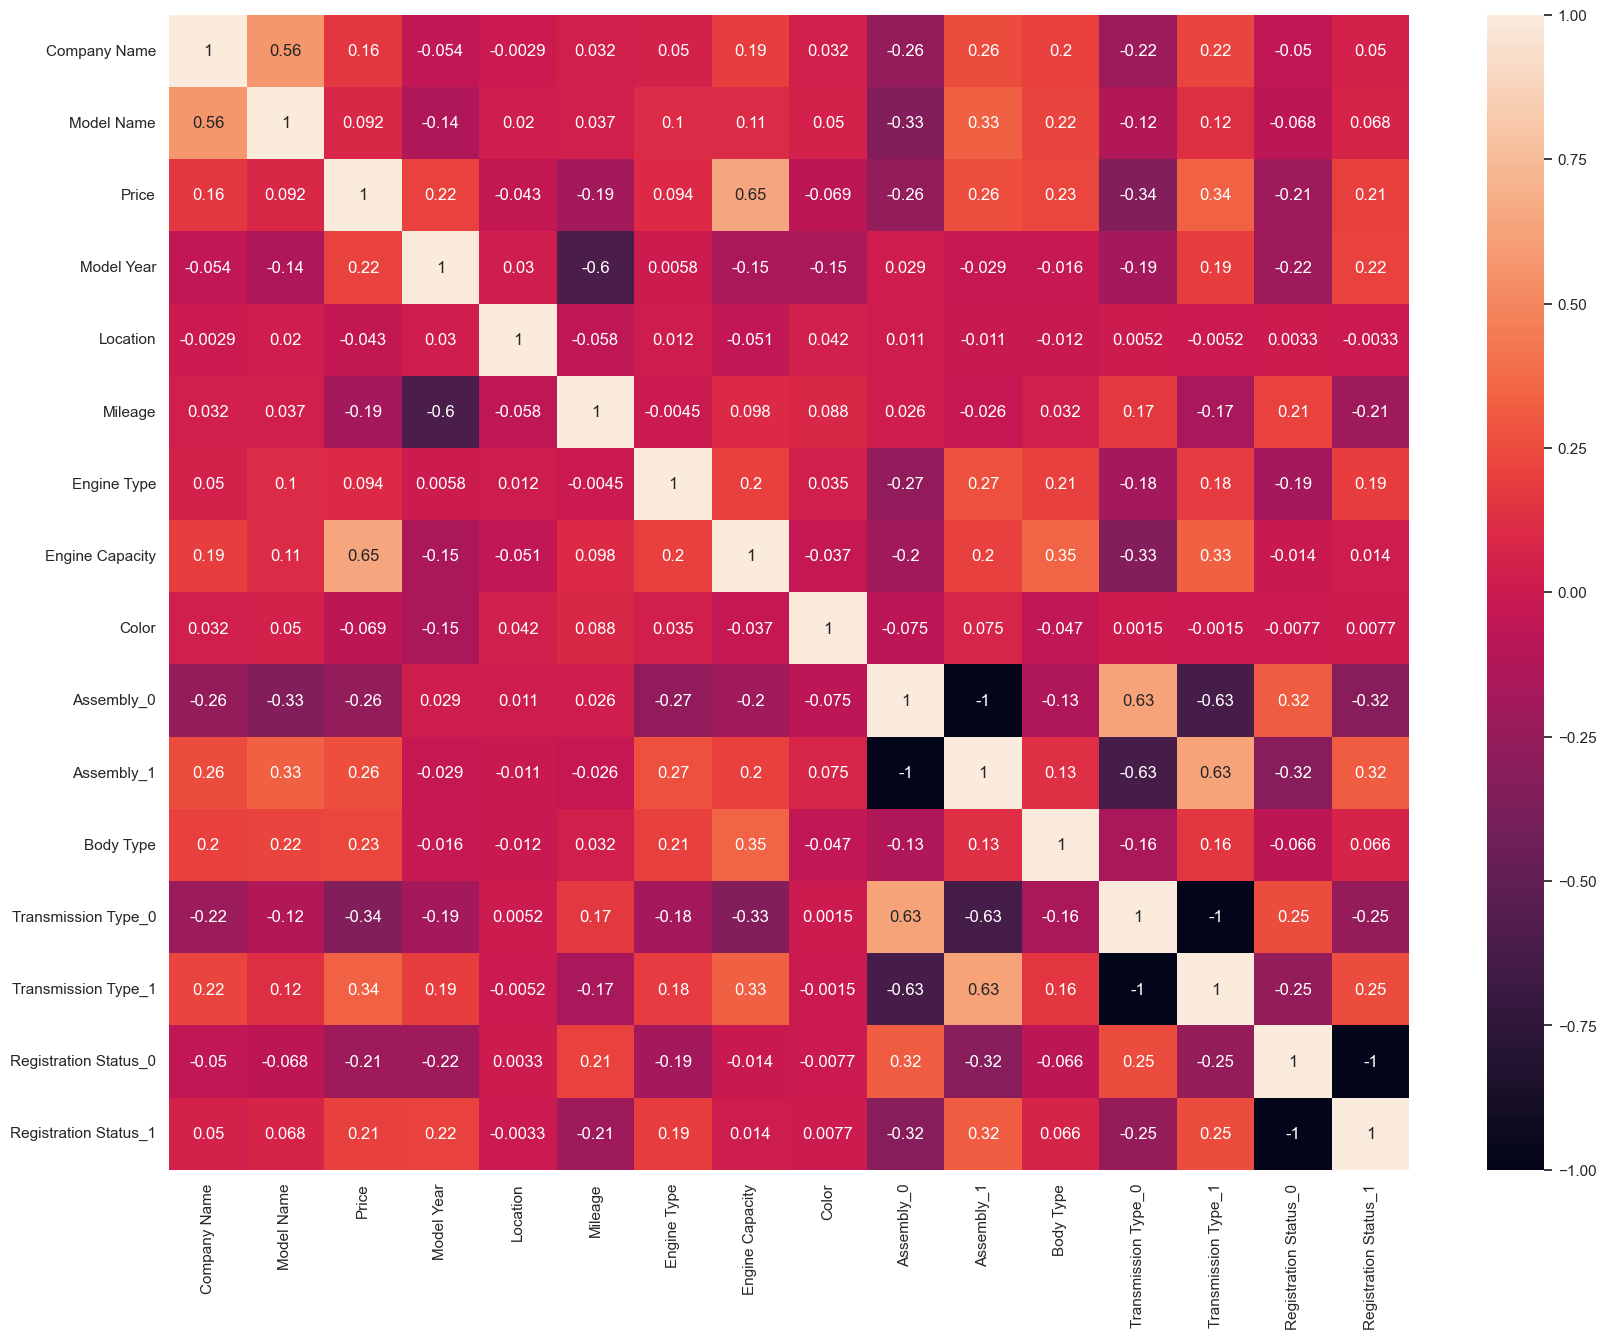

In [31]:
# This code creates a heatmap visualization of the correlation matrix for the DataFrame 'df' 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Understanding Distribution of Data

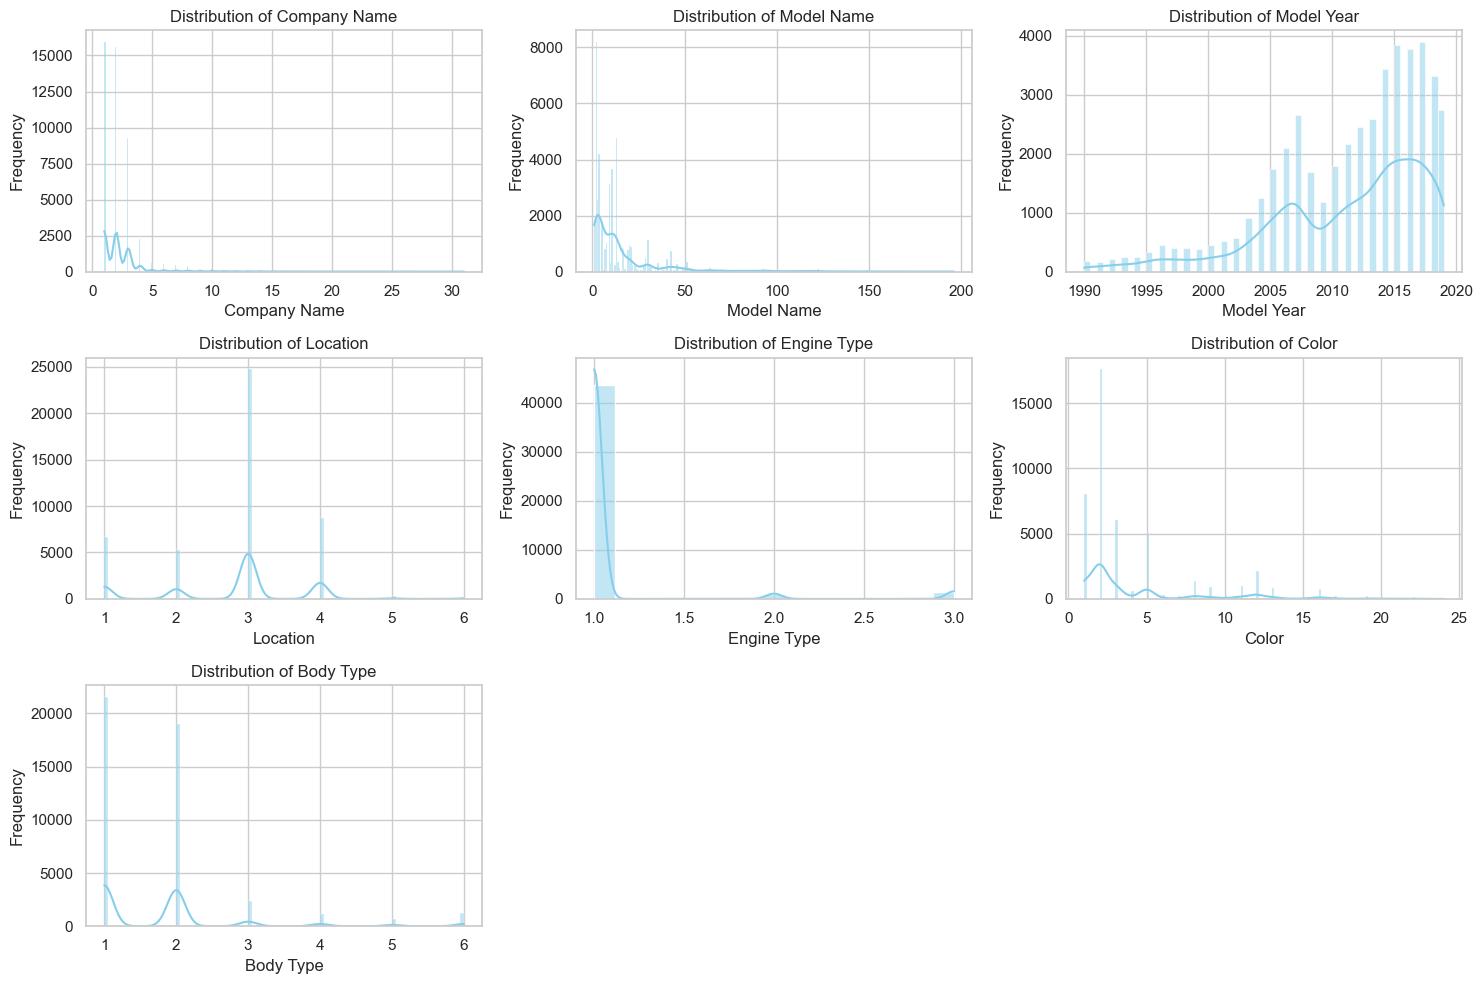

In [32]:
# Select the columns for which you want to create distplots
columns_for_distplot = [
    'Company Name', 'Model Name', 'Model Year', 'Location', 'Engine Type',
    'Color', 'Body Type'
]

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot distplots for each specified column
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, column in enumerate(columns_for_distplot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Box Plot To Detect Outliers in Columns 

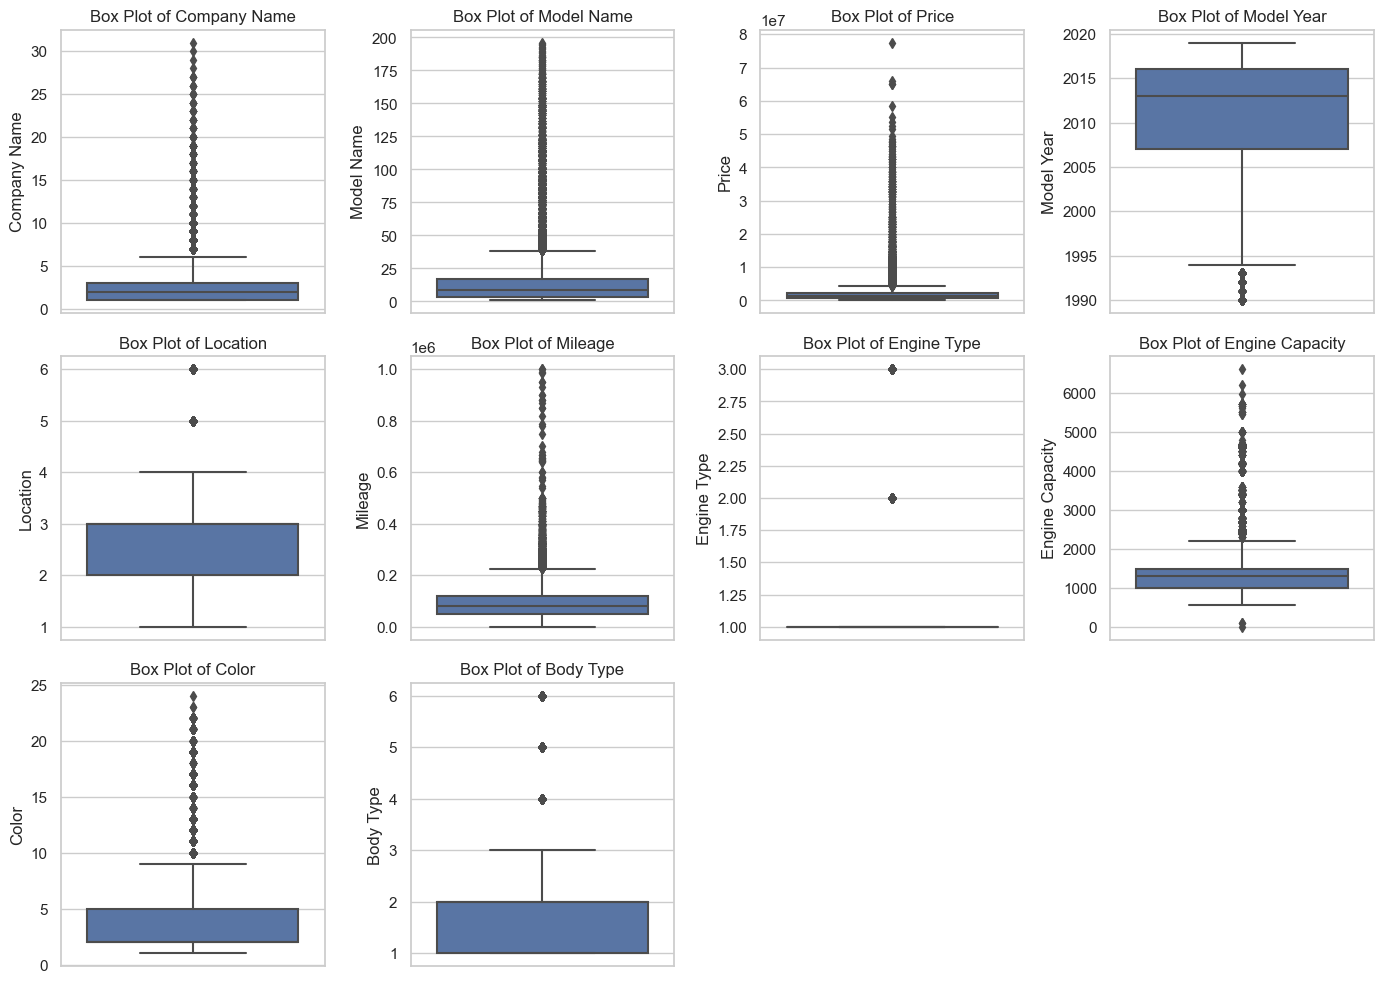

In [33]:
# List of columns for which you want box plots
columns_for_boxplot = [
    'Company Name', 'Model Name', 'Price', 'Model Year', 'Location', 'Mileage', 'Engine Type',
    'Engine Capacity', 'Color', 'Body Type'
]

# Set up the plotting environment
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(3, 3+1, i)  # Adjusted the subplot layout to 3 rows and 3 columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Handling Outliers

In [34]:
# List of columns for which you want to apply capping
columns_for_capping = [
    'Company Name', 'Model Name', 'Price', 'Model Year', 'Location', 'Mileage', 'Engine Type',
    'Engine Capacity', 'Color', 'Body Type'
]

# Define a function for capping
def cap_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return x.clip(lower=lower_bound, upper=upper_bound)

# Apply the capping function to the specified columns
df[columns_for_capping] = df[columns_for_capping].apply(cap_outliers)

## Box Plot After Handling Outliers

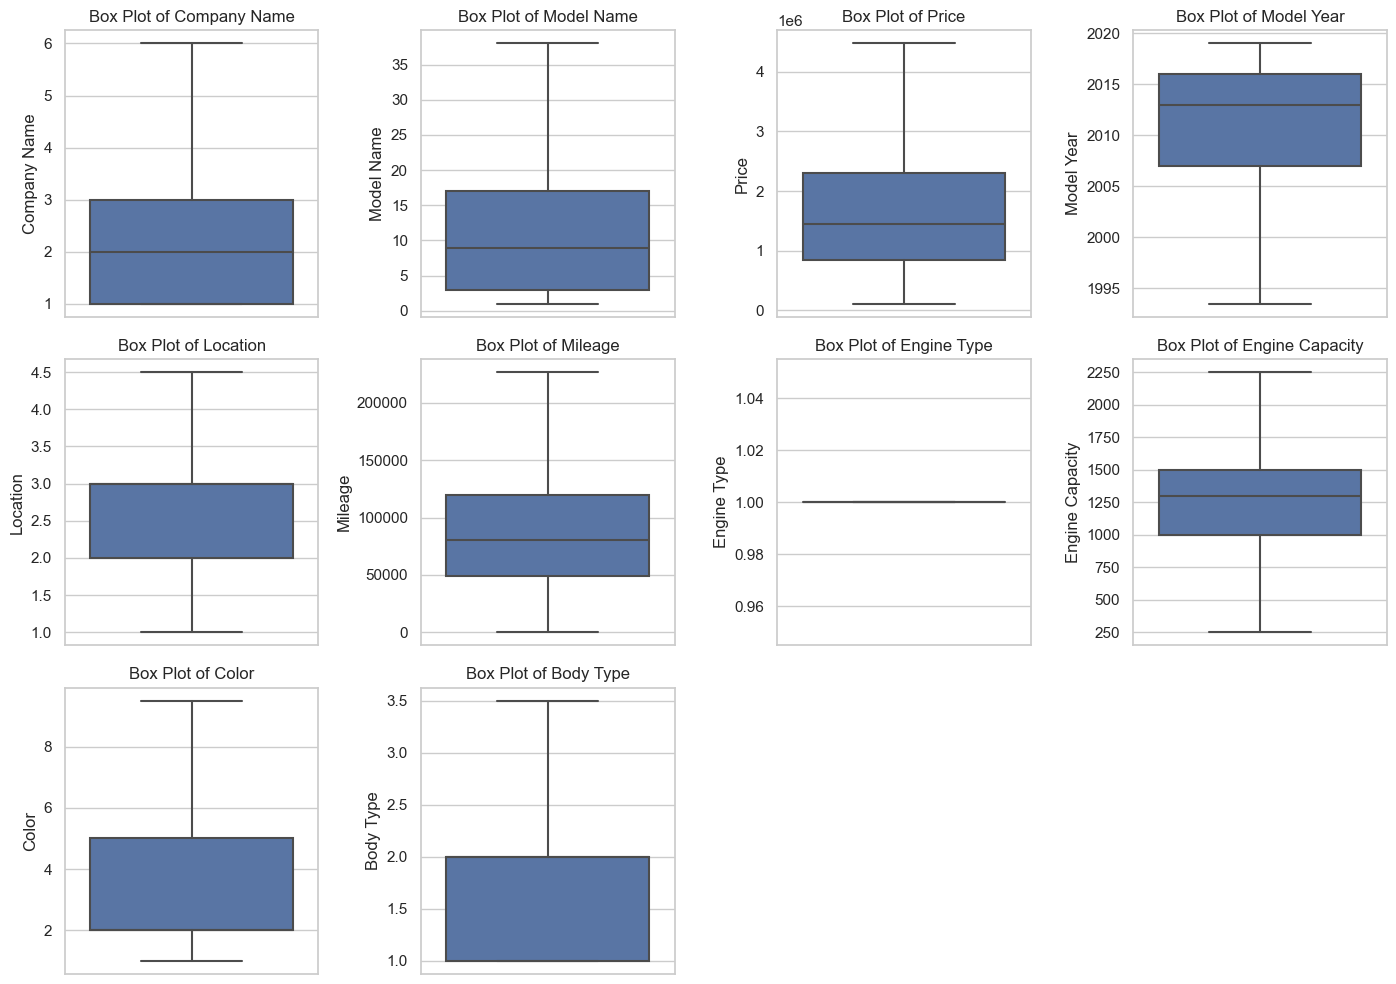

In [35]:
# List of columns for which you want box plots
columns_for_boxplot = [
    'Company Name', 'Model Name', 'Price', 'Model Year', 'Location', 'Mileage', 'Engine Type',
    'Engine Capacity', 'Color', 'Body Type'
]

# Set up the plotting environment
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(3, 3+1, i)  # Adjusted the subplot layout to 3 rows and 3 columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Standardization

In [36]:
# List of columns for standardization
columns_for_std = [
    'Company Name', 'Model Name', 'Price', 'Model Year', 'Location', 'Mileage', 'Engine Type',
    'Engine Capacity', 'Color', 'Body Type'
]

# Applying Standardization
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform them
df[columns_for_std] = scaler.fit_transform(df[columns_for_std])

In [37]:
# scaler.mean_ stores the means of the original features after scaling or standardization
scaler.mean_

array([2.20112120e+00, 1.28743862e+01, 1.70172139e+06, 2.01106690e+03,
       2.80437617e+00, 8.85737574e+04, 1.00000000e+00, 1.25846541e+03,
       3.65600148e+00, 1.68323845e+00])

In [38]:
# Showing Dataset
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
0,-0.156201,-0.994403,0.631770,0.940878,-1.930121,-1.455673,0.0,-0.603044,-0.926741,0,1,-0.904494,0,1,0,1
1,-0.156201,-0.910660,-1.470805,1.258040,-0.860432,-1.432702,0.0,0.096907,-0.577818,1,0,0.419339,0,1,1,0
2,-0.932850,-0.826916,-0.158776,1.258040,-0.860432,-1.314535,0.0,-1.396322,-0.577818,1,0,-0.904494,0,1,0,1
3,-0.932850,-0.826916,-0.047822,1.258040,0.209257,-1.460648,0.0,-1.396322,-0.577818,1,0,-0.904494,1,0,1,0
4,-0.156201,-0.910660,-0.246615,-0.169191,-1.930121,0.581240,0.0,0.096907,-0.228894,1,0,0.419339,1,0,1,0


In [39]:
# Generate descriptive statistics for each column in DataFrame 'df' and round the results to one decimal place using NumPy
np.round(df.describe(), 1)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly_0,Assembly_1,Body Type,Transmission Type_0,Transmission Type_1,Registration Status_0,Registration Status_1
count,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0,46022.0
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.7,0.3,0.0,0.5,0.5,0.9,0.1
std,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5,0.3,0.3
min,-0.9,-1.0,-1.5,-2.8,-1.9,-1.6,0.0,-2.4,-0.9,0.0,0.0,-0.9,0.0,0.0,0.0,0.0
25%,-0.9,-0.8,-0.8,-0.6,-0.9,-0.7,0.0,-0.6,-0.6,0.0,0.0,-0.9,0.0,0.0,1.0,0.0
50%,-0.2,-0.3,-0.2,0.3,0.2,-0.2,0.0,0.1,-0.6,1.0,0.0,0.4,1.0,0.0,1.0,0.0
75%,0.6,0.3,0.6,0.8,0.2,0.6,0.0,0.6,0.5,1.0,1.0,0.4,1.0,1.0,1.0,0.0
max,3.0,2.1,2.6,1.3,1.8,2.6,0.0,2.3,2.0,1.0,1.0,2.4,1.0,1.0,1.0,1.0


## Checking Distribution of Data After Standardization

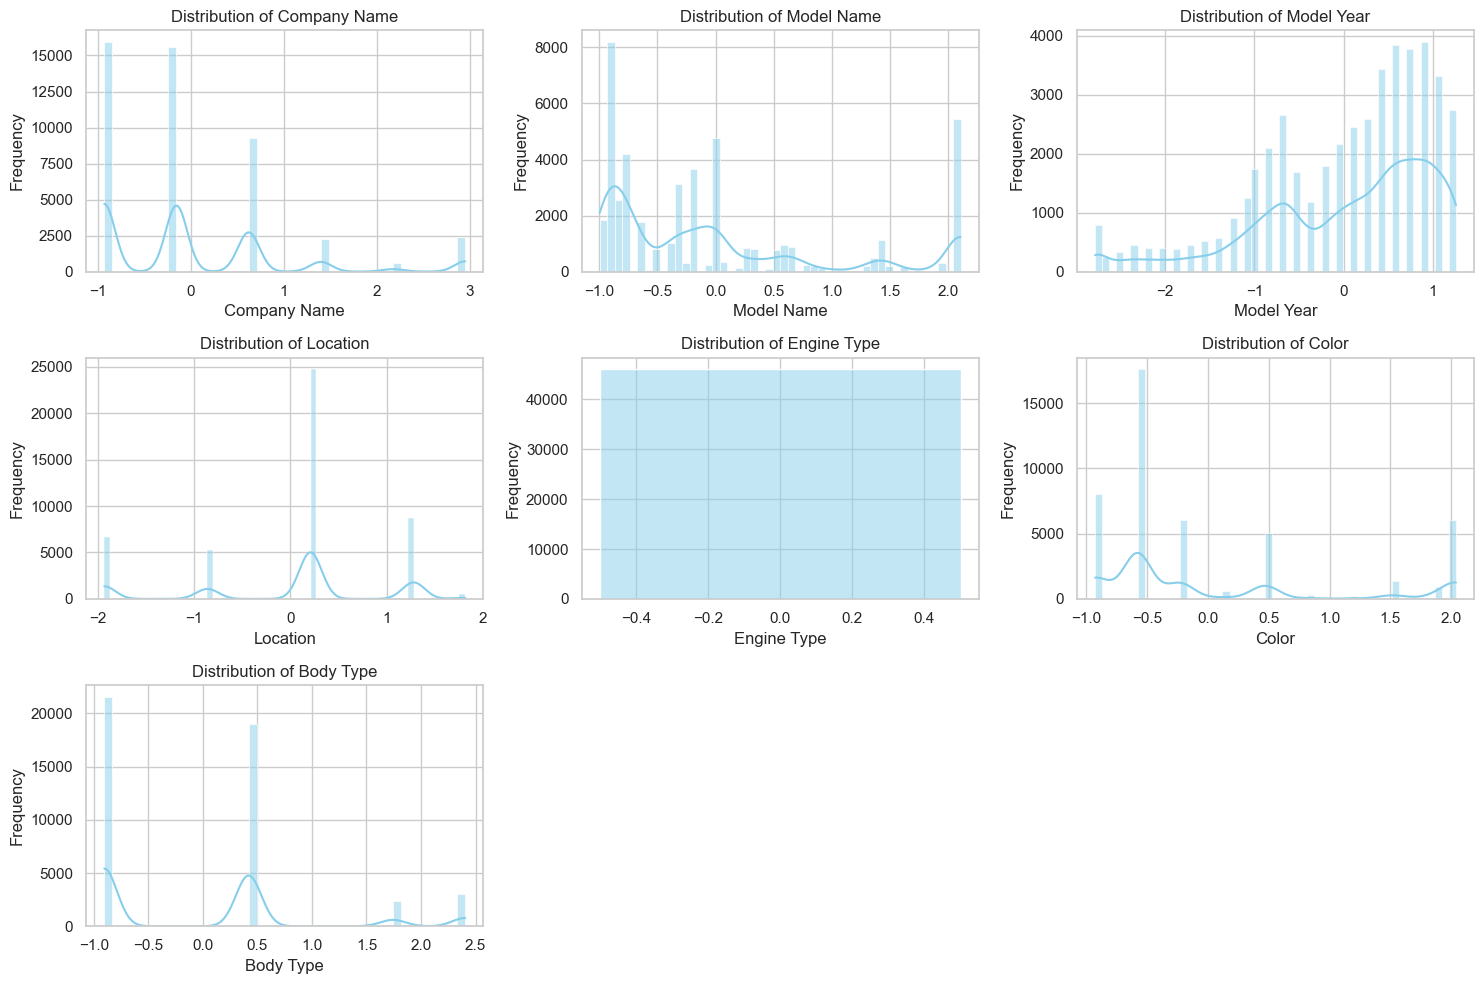

In [40]:
# Select the columns for which you want to create distplots
columns_for_distplot = [
    'Company Name', 'Model Name', 'Model Year', 'Location', 'Engine Type',
    'Color', 'Body Type'
]

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot distplots for each specified column
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, column in enumerate(columns_for_distplot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Splitting Data into Training and Testing 

In [41]:
# Splitting the data
y = df["Price"]
X = df.drop("Price", axis = 1)

In [42]:
# train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# See the shape of X_train and X_test data
X_train.shape, X_test.shape

((36817, 15), (9205, 15))

In [44]:
# See the shape of y_train and y_test data
y_train.shape, y_test.shape

((36817,), (9205,))

In [45]:
# Stores the X_test shape value in two variables 'n' and 'k'
n = 9205
k = 15

# Linear Regression Algorithm

In [46]:
"""Train a Linear Regression model, make predictions, and evaluate its performance using MAE, MSE, RMSE, R-squared, and 
adjusted R-squared."""


# Initialize and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = sqrt(mse1)

r1 = r2_score(y_test, y_pred)
adjusted_r2_score1 = 1 - (((1 - r1) * (n - 1)) / (n - 1 - k))

print(f'Mean Squared Error: {mse1}')
print(f'Mean Absolute Error (MAE): {mae1}')
print(f'Root Mean Squared Error (RMSE): {rmse1}')
print(f'R-squared (R2) Score:" {r1}')
print(f'adjusted r2 score:" {adjusted_r2_score1}')

Mean Squared Error: 0.1591159763130894
Mean Absolute Error (MAE): 0.28684830690780644
Root Mean Squared Error (RMSE): 0.3988934397970082
R-squared (R2) Score:" 0.8411242016506717
adjusted r2 score:" 0.8408648549344632


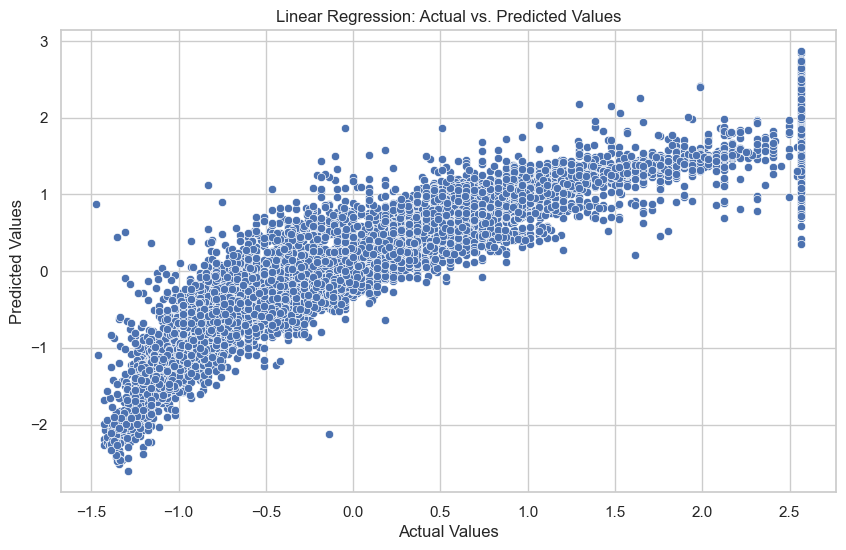

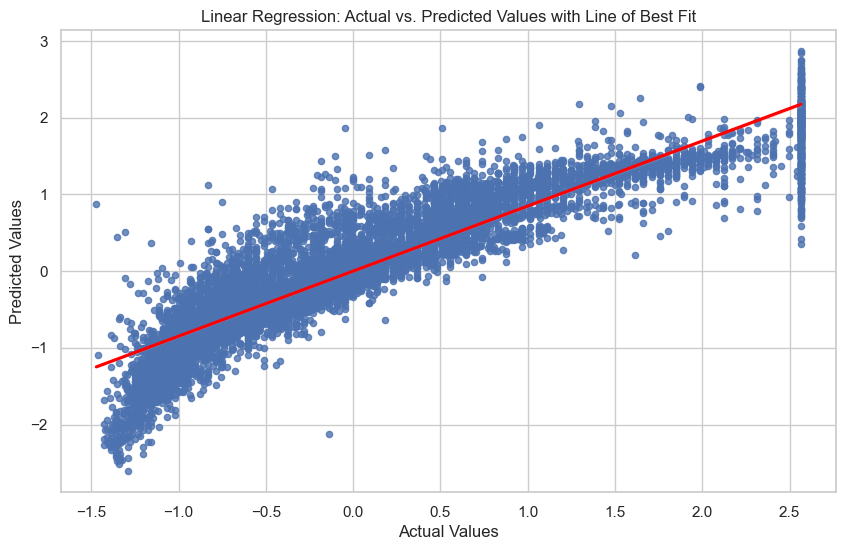

In [47]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Linear Regression: Actual vs. Predicted Values with Line of Best Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Random Forest Regressor Algorithm

In [48]:
"""This code initializes and trains a Random Forest regression model with 100 estimators, makes predictions, and calculates 
evaluation metrics including MAE, MSE, R2 score, and RMSE, then prints the results to assess the model's performance."""

rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
adjusted_r2_score = 1 - (((1 - r2_rf) * (n - 1)) / (n - 1 - k))

print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R-squared (R2) Score: {r2_rf}')
print(f'adjusted r2 score: {adjusted_r2_score}')

Mean Absolute Error (MAE): 0.110470928950315
Mean Squared Error (MSE): 0.038492002111855786
Root Mean Squared Error (RMSE): 0.1961937871387771
R-squared (R2) Score: 0.961566099726203
adjusted r2 score: 0.9615033607443653


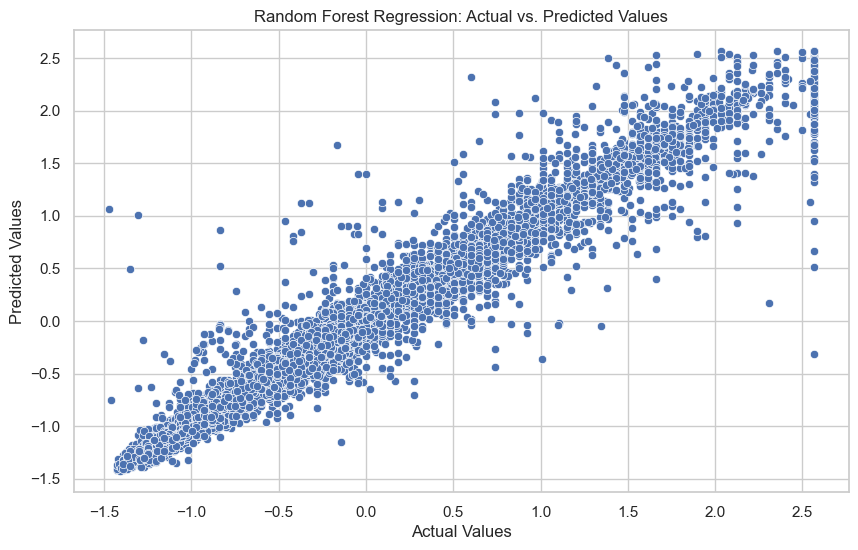

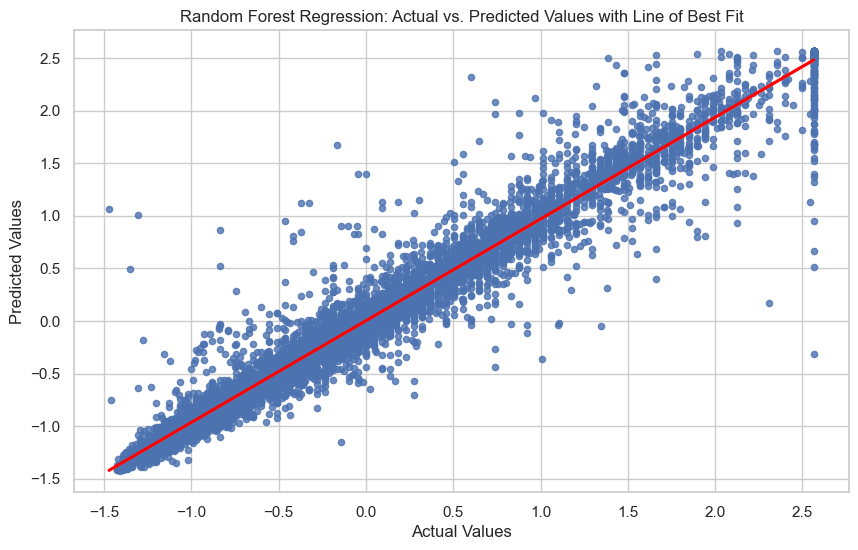

In [49]:
# Scatter plot of actual vs. predicted values for Random Forest model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Random Forest Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Line of best fit for Random Forest model
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Random Forest Regression: Actual vs. Predicted Values with Line of Best Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Decision Tree Regressor Algorithm

In [50]:
"""Initialize and train a Decision Tree Regressor, make predictions, and evaluate its performance using various metrics MAE, 
MSE, RMSE, R-squared, and adjusted R-squared."""

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
adjusted_r2_score1 = 1 - (((1 - r1) * (n - 1)) / (n - 1 - k))

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')
print(f'adjusted r2 score: {adjusted_r2_score}')

Mean Squared Error: 0.06319034446893808
Mean Absolute Error: 0.1357750611818111
Root Mean Squared Error: 0.251376897245825
R-squared (R2) Score: 0.936905038336834
adjusted r2 score: 0.9615033607443653


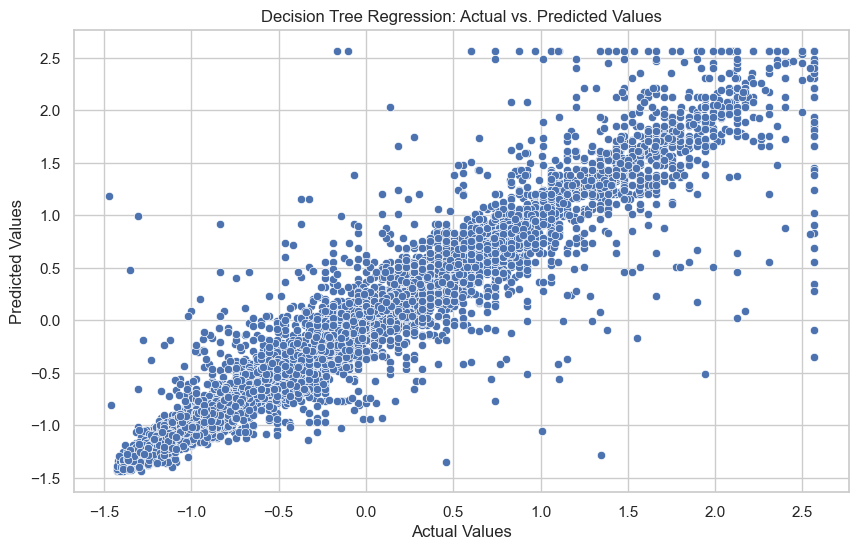

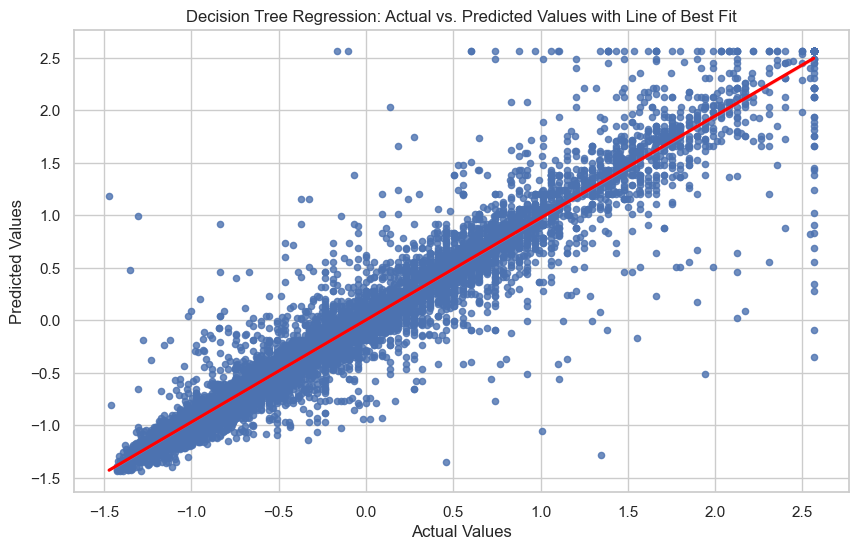

In [51]:
# Scatter plot of actual vs. predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Decision Tree Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Line of best fit for Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Decision Tree Regression: Actual vs. Predicted Values with Line of Best Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()